In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
y_test.shape

(10000,)

In [6]:
x_train[0].shape

(28, 28)

In [7]:
x_test[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

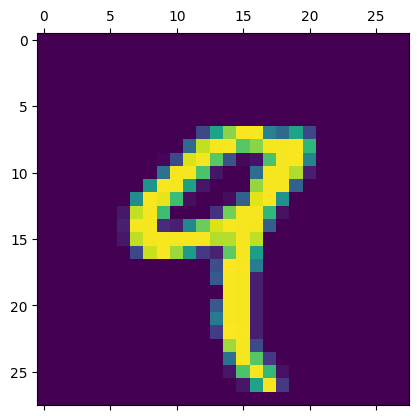

In [8]:
plt.matshow(x_train[4])

In [9]:
y_train[4]

9

In [10]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
x_train.shape #(60000 ,28 ,28) first number 600000 is number of sample 28x28 is sape of the each induvidual image.

(60000, 28, 28)

In [12]:
#scaling my value between 0 and 1
x_train=x_train/255
x_test=x_test/255

In [13]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Now we want to re-sape of the each picture by 28*28=784.(come into a 784x1 matrix)

## Convert 2D array to 1D array

In [14]:
x_train_flattened=x_train.reshape(len(x_train),28*28)
x_test_flattened=x_test.reshape(len(x_test),28*28)

In [15]:
x_train_flattened.shape

(60000, 784)

In [16]:
x_train_flattened[0].shape

(784,)

## Now we are going to do simple neural network

In [17]:
# 10 here output
model=keras.Sequential([
    keras.layers.Dense(10,input_shape=(784,),activation='softmax') #this is the API of neuron
])

#compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', #'sparse_categorical_crossentropy' particular type of loss function
    metrics=['accuracy']
)

model.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4643 - accuracy: 0.8787
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3034 - accuracy: 0.9147
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2830 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2731 - accuracy: 0.9238
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2666 - accuracy: 0.9255


In [18]:
#previous step if we don't feature scaling then we not get accuracy of 92%
# NOTE: Scaling is a technic to improve feature scaling

In [19]:
#Test accuracy on test data set
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2689 - accuracy: 0.9260


[0.26887235045433044, 0.9259999990463257]

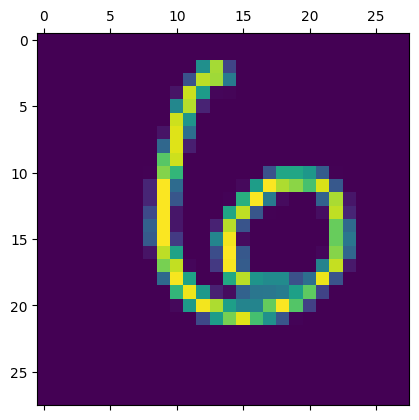

In [20]:
plt.matshow(x_test[100])

In [21]:
y_predicted=model.predict(x_test_flattened)
y_predicted[100]

313/313 [==============================] - 1s 2ms/step


array([1.7330925e-04, 6.2618114e-04, 3.6565080e-02, 7.4597943e-04,
       3.0181021e-04, 4.8115180e-05, 9.6070039e-01, 4.7064288e-05,
       7.5314275e-04, 3.8958431e-05], dtype=float32)

In [22]:
y_predicted.shape

(10000, 10)

In [23]:
#previous give 10 output of the neuron . We want to find maximum value

In [24]:
np.argmax(y_predicted[100]) # give output index of maximum value

6

## Now we create hiden layer in neuron

In [31]:
# 10 here output
model1=keras.Sequential([
    keras.layers.Dense(100,input_shape=(784,),activation='relu'), #this is the API of neuron
    keras.layers.Dense(10,activation='softmax')
])

#compile the model
model1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy', #'sparse_categorical_crossentropy' particular type of loss function
    metrics=['accuracy']
)

model1.fit(x_train_flattened,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2778 - accuracy: 0.9206
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1245 - accuracy: 0.9634
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0866 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0651 - accuracy: 0.9799
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0516 - accuracy: 0.9834


In [32]:
#Accuracy check on test set
model1.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0787 - accuracy: 0.9767


[0.0786873921751976, 0.9767000079154968]

In [33]:
# see after add hiden layer my accuracy will be increase from 92% to 97% and loss is reducr 26% to 8%

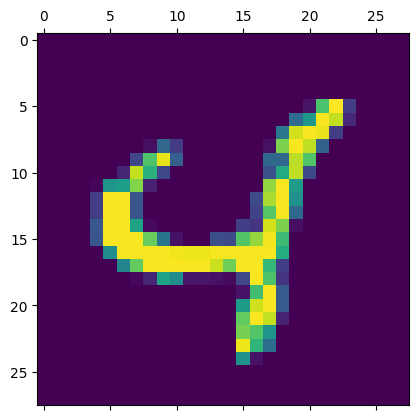

In [34]:
plt.matshow(x_test[67])

In [35]:
y_predicted=model1.predict(x_test_flattened)
y_predicted[67]

313/313 [==============================] - 1s 2ms/step


array([1.7321954e-10, 7.7226338e-07, 5.3268616e-07, 9.5239237e-08,
       9.9998295e-01, 3.0876675e-09, 8.1636403e-10, 1.0727298e-06,
       1.8585750e-08, 1.4649975e-05], dtype=float32)

In [36]:
np.argmax(y_predicted[67]) # give output index of maximum value

4